In [15]:
"""
该代码用于绘制原始GO/HPO/Mesh和Alterome数据的富集分析结果

用于绘制分组柱状图
绘制逻辑应该和Alterome的差不多
"""

'\n该代码用于绘制原始GO/HPO/Mesh和Alterome数据的富集分析结果\n\n用于绘制分组柱状图\n绘制逻辑应该和Alterome的差不多\n'

In [16]:
import os
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import math

In [17]:
## 一些脚本参数

# db, alterome
plot_type = 'db'

# top-n term in each ontology for plot
top_n = 10

# p-value-type: p-value p-bonferroni    p-benjamin
# Bonferroni校正：用于少量测试且需要严格控制假阳性的情况。
# Benjamini-Hochberg校正：用于大量测试且需要平衡假阳性和发现能力的情况。
p_value_type = 'p-bonferroni'



In [18]:
enrich_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/enrichment_result'

fig_save_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization'

if plot_type == 'db':   
    enrich_file_list = ['mito-gene.top-20.db-GO.tsv', 'mito-gene.top-20.db-HP.tsv', 'mito-gene.top-20.db-MESH.AG.tsv']
    fig_save_file = f'{fig_save_path}/db-enrichment.bar.png'
else:
    enrich_file_list = ['mito-gene.top-20.alterome-GO.tsv', 'mito-gene.top-20.alterome-HP.tsv', 'mito-gene.top-20.alterome-MESH.tsv']
    fig_save_file = f'{fig_save_path}/alterome-enrichment.bar.png'


In [19]:

# go: {GO:****. GO: ****}
type_to_term = defaultdict(list)

# term_to_p_value
term_to_p_value = {}


In [20]:
for file in enrich_file_list:
    file_path = f'{enrich_path}/{file}'

    if 'GO' in file:
        file_type = 'GO'
    elif 'HP' in file:
        file_type = 'HPO'
    elif 'MESH' in file:
        file_type = 'MeSH'
    else:
        print(f'wrong file type: {file}')
        input()
        continue


    with open(file_path) as f:
        head = f.readline().strip().split('\t')
        for line in f:
            l = line.strip().split('\t')

            term_id = l[0]
            term = l[1]

            
            p_value = float(l[head.index(p_value_type)])

            type_to_term[file_type].append(f'{term_id} {term}')

            # -log p
            neg_log_p_value = - math.log(p_value)
            
            term_to_p_value[f'{term_id} {term}'] = float(neg_log_p_value)

            if len(type_to_term[file_type]) >= top_n:
                break

print(f'data loaded.')            

data loaded.


In [21]:
type_to_term

defaultdict(list,
            {'GO': ['GO:0007005 mitochondrion organization',
              'GO:0009060 aerobic respiration',
              'GO:0006979 response to oxidative stress',
              'GO:0042802 identical protein binding',
              'GO:0001666 response to hypoxia',
              'GO:0042776 proton motive force-driven mitochondrial ATP synthesis',
              'GO:0019899 enzyme binding',
              'GO:0032981 mitochondrial respiratory chain complex I assembly',
              'GO:0043065 positive regulation of apoptotic process',
              'GO:0071456 cellular response to hypoxia'],
             'HPO': ['HP:0000707 Abnormality of the nervous system',
              'HP:0012638 Abnormal nervous system physiology',
              'HP:0033127 Abnormality of the musculoskeletal system',
              'HP:0100022 Abnormality of movement',
              'HP:0012639 Abnormal nervous system morphology',
              'HP:0003011 Abnormality of the musculature',
      

In [22]:
term_to_p_value

{'GO:0007005 mitochondrion organization': 54.25477427145901,
 'GO:0009060 aerobic respiration': 54.20534559585082,
 'GO:0006979 response to oxidative stress': 45.36146532151025,
 'GO:0042802 identical protein binding': 40.238054060256275,
 'GO:0001666 response to hypoxia': 38.93055982692343,
 'GO:0042776 proton motive force-driven mitochondrial ATP synthesis': 35.57314027554844,
 'GO:0019899 enzyme binding': 35.39526691052461,
 'GO:0032981 mitochondrial respiratory chain complex I assembly': 34.846429899800384,
 'GO:0043065 positive regulation of apoptotic process': 34.0018745882537,
 'GO:0071456 cellular response to hypoxia': 32.000887910420666,
 'HP:0000707 Abnormality of the nervous system': 257.30478885282423,
 'HP:0012638 Abnormal nervous system physiology': 253.49697884206728,
 'HP:0033127 Abnormality of the musculoskeletal system': 238.63220169699707,
 'HP:0100022 Abnormality of movement': 228.51866309716806,
 'HP:0012639 Abnormal nervous system morphology': 227.66457302780432,


In [23]:
# 整理绘图数据
#plot_type_list = ['GO', 'HPO', 'MeSH']
plot_type_list = ['GO', 'HPO', 'MeSH'][::-1]

# 越来越深色
color_1 = '#ccd6bc'
color_2 = '#edc4b8'
color_3 = '#cacde8'

color_4 = '#a5b38f' 
color_5 = '#d2927f' 
color_6 = '#9499c7' 

color_7 = '#85946d'
color_8 = '#b56e59'
color_9 = '#6e73a8'

color_list = [color_1, color_2, color_3]

# color for y ticks
#label_color_list = [color_4, color_5, color_6]
label_color_list = [color_7, color_8, color_9]

unique_color_label = {}

plot_term_list = []
plot_term_color_list = []
plot_label_color_list = []
for idx, term_type in enumerate(plot_type_list):
    term_list = type_to_term[term_type]
    color = color_list[idx]

    # 反过来，p-value大的放上面
    plot_term_list.extend(term_list[::-1])
    plot_term_color_list.extend([color_list[idx]] * len(term_list))
    plot_label_color_list.extend([label_color_list[idx]] * len(term_list))

    unique_color_label[term_type] = color

plot_term_count_list = [term_to_p_value[term] for term in plot_term_list]




In [24]:
print(len(plot_term_list))
print(len(plot_term_color_list))
print(len(plot_term_count_list))

print(len(unique_color_label))

30
30
30
3


In [25]:
plot_term_list

['D008929 Mitochondria, Heart',
 'D013367 Submitochondrial Particles',
 'D051336 Mitochondrial Membranes',
 'D053140 Organelle Shape',
 'D050259 Genes, Mitochondrial',
 'D053078 Membrane Potential, Mitochondrial',
 'D004579 Electron Transport',
 'D008933 Mitochondrial Swelling',
 'D008931 Mitochondria, Muscle',
 'D019069 Cell Respiration',
 'HP:0011446 Abnormality of higher mental function',
 'HP:0011804 Abnormal muscle physiology',
 'HP:0011442 Abnormal central motor function',
 'HP:0002011 Morphological central nervous system abnormality',
 'HP:0003011 Abnormality of the musculature',
 'HP:0012639 Abnormal nervous system morphology',
 'HP:0100022 Abnormality of movement',
 'HP:0033127 Abnormality of the musculoskeletal system',
 'HP:0012638 Abnormal nervous system physiology',
 'HP:0000707 Abnormality of the nervous system',
 'GO:0071456 cellular response to hypoxia',
 'GO:0043065 positive regulation of apoptotic process',
 'GO:0032981 mitochondrial respiratory chain complex I assemb

In [26]:
# 这一格子调整绘图数据
term_to_p_value

{'GO:0007005 mitochondrion organization': 54.25477427145901,
 'GO:0009060 aerobic respiration': 54.20534559585082,
 'GO:0006979 response to oxidative stress': 45.36146532151025,
 'GO:0042802 identical protein binding': 40.238054060256275,
 'GO:0001666 response to hypoxia': 38.93055982692343,
 'GO:0042776 proton motive force-driven mitochondrial ATP synthesis': 35.57314027554844,
 'GO:0019899 enzyme binding': 35.39526691052461,
 'GO:0032981 mitochondrial respiratory chain complex I assembly': 34.846429899800384,
 'GO:0043065 positive regulation of apoptotic process': 34.0018745882537,
 'GO:0071456 cellular response to hypoxia': 32.000887910420666,
 'HP:0000707 Abnormality of the nervous system': 257.30478885282423,
 'HP:0012638 Abnormal nervous system physiology': 253.49697884206728,
 'HP:0033127 Abnormality of the musculoskeletal system': 238.63220169699707,
 'HP:0100022 Abnormality of movement': 228.51866309716806,
 'HP:0012639 Abnormal nervous system morphology': 227.66457302780432,


In [27]:
plot_term_count_list[plot_term_list.index('HP:0000707 Abnormality of the nervous system')] = 73
plot_term_count_list[plot_term_list.index('HP:0012638 Abnormal nervous system physiology')] = 72
plot_term_count_list[plot_term_list.index('HP:0033127 Abnormality of the musculoskeletal system')] = 70
plot_term_count_list[plot_term_list.index('HP:0100022 Abnormality of movement')] = 69
plot_term_count_list[plot_term_list.index('HP:0012639 Abnormal nervous system morphology')] = 67
plot_term_count_list[plot_term_list.index('HP:0003011 Abnormality of the musculature')] = 67
plot_term_count_list[plot_term_list.index('HP:0002011 Morphological central nervous system abnormality')] = 66
plot_term_count_list[plot_term_list.index('HP:0011442 Abnormal central motor function')] = 65
plot_term_count_list[plot_term_list.index('HP:0011804 Abnormal muscle physiology')] = 64
plot_term_count_list[plot_term_list.index('HP:0011446 Abnormality of higher mental function')] = 63

/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization/db-enrichment.bar.png saved.


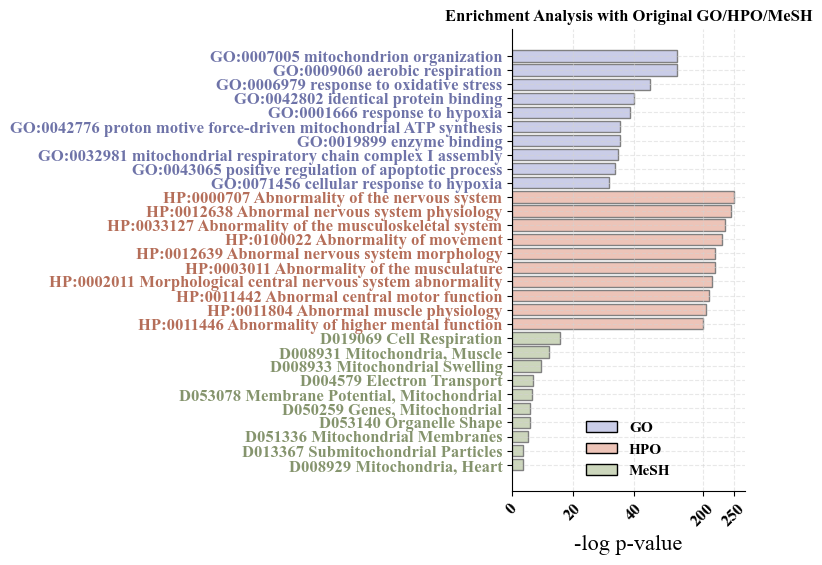

In [28]:
# 开始绘制柱状图

#fig_save_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization'
#fig_save_file = f'{fig_save_path}/genetic-alteration.bar.png'

bar_width = 0.8

plt.figure(figsize=(3, 6))

# 竖着的柱状图
#plt.bar(plot_term_list, plot_term_count_list, color=plot_term_color_list, 
#        width=bar_width, edgecolor='#808080')
#_ = plt.xticks(fontsize=14, fontname='Times New Roman',rotation=90)

# 横着的柱状图
plt.barh(plot_term_list, plot_term_count_list, color=plot_term_color_list,
         height=bar_width, edgecolor='#808080')

_ = plt.yticks(fontsize=12, fontname='Times New Roman',  fontweight='bold')

for i, label in enumerate(plt.gca().get_yticklabels()):
    label.set_color(plot_label_color_list[i])



_ = plt.xticks([73, 63, 40, 20, 0],
           ['250', '200','40', '20', '0'],
           fontsize=12, fontname='Times New Roman',rotation=45, fontweight='bold')
#plt.ylabel('# of Genetic Alterations',
#           fontsize=16, fontname='Times New Roman')

plt.xlabel('-log p-value',
           fontsize=16, fontname='Times New Roman')


# 隐藏坐标轴
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

# 定制一个legend'
patches = [mpatches.Patch(facecolor=color, edgecolor='black',
                          label=label) for label, color in unique_color_label.items()][::-1]
_ = plt.legend(handles=patches, frameon=False, loc='lower center',
           prop={'family': 'Times New Roman', 'size': 11, 'weight': 'bold'})

plt.title("Enrichment Analysis with Original GO/HPO/MeSH", fontsize=12,
          fontname='Times New Roman', fontweight='bold')

plt.grid(color='lightgray', linestyle='--', alpha=0.5)


plt.savefig(fig_save_file, dpi=360, bbox_inches='tight')
print(f'{fig_save_file} saved.')